In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
245 2023-10-23  136.229996  139.020004  135.110001  137.899994  137.899994   
246 2023-10-24  139.160004  140.710007  138.750000  140.119995  140.119995   
247 2023-10-25  129.770004  130.100006  126.089996  126.669998  126.669998   
248 2023-10-26  124.470001  125.459999  122.320000  123.440002  123.440002   
249 2023-10-27  124.029999  124.440002  121.459999  123.400002  123.400002   

       Volume  
245  20780700  
246  26535200  
247  58796100  
248  33907400  
249  37349000  


In [2]:
data=data[["Date","Close"]]
data.head()

,Date,Close
0,2022-10-31,94.660004
1,2022-11-01,90.500000
2,2022-11-02,87.070000
3,2022-11-03,83.489998
4,2022-11-04,86.699997


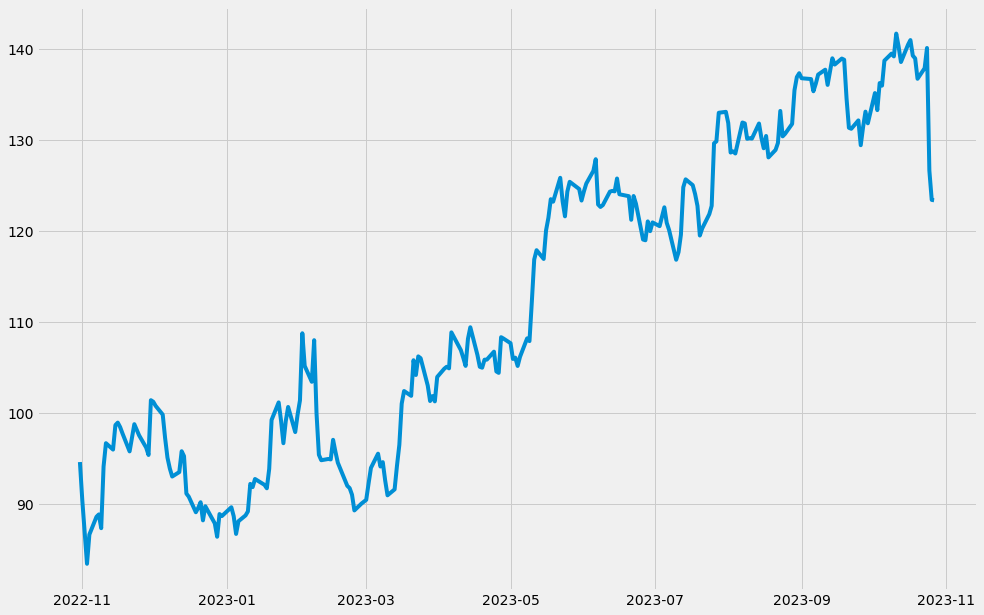

In [7]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data["Close"])


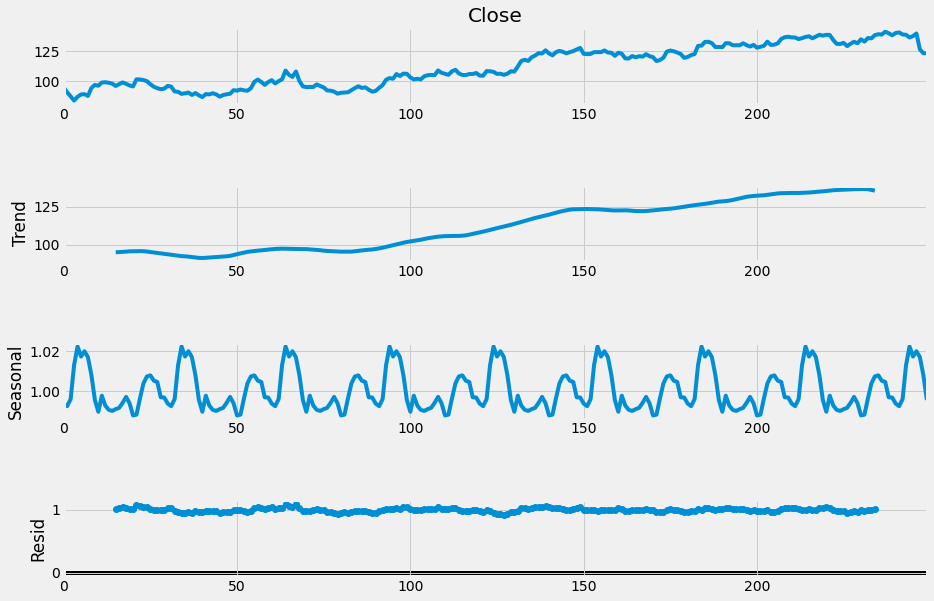

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = result.plot()
fig.set_size_inches(15, 10)


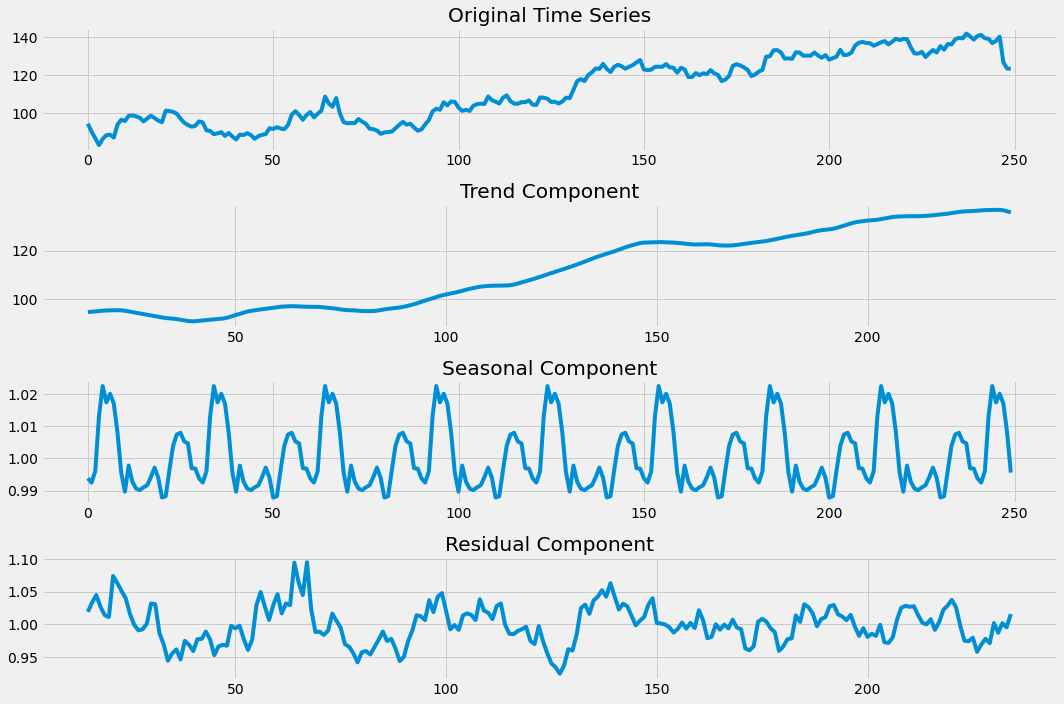

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have your time series data in a variable called 'data'
# For example: data = pd.read_csv('your_dataset.csv', parse_dates=['Date'], index_col='Date')

# Perform seasonal decomposition
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)

# Plotting
plt.figure(figsize=(15, 10))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(data["Close"])
plt.title('Original Time Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

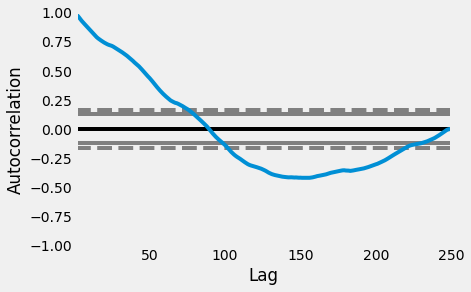

In [13]:
pd.plotting.autocorrelation_plot(data["Close"])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


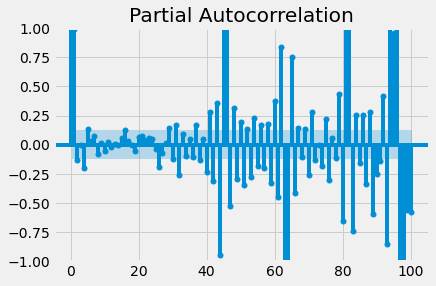

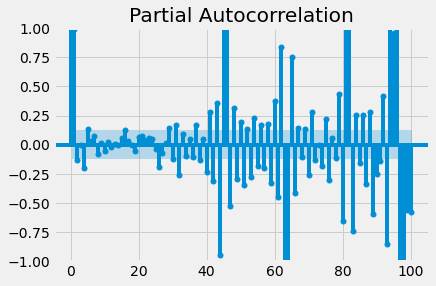

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming you have your time series data in a variable called 'data'
# For example: data = pd.read_csv('your_dataset.csv', parse_dates=['Date'], index_col='Date')

# Define p, d, q
p, d, q = 5, 1, 2

# Create ARIMA model
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()

# Print model summary
print(fitted.summary())


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -559.543
Date:                Mon, 30 Oct 2023   AIC                           1135.087
Time:                        20:41:13   BIC                           1163.227
Sample:                             0   HQIC                          1146.414
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4947      0.075     19.843      0.000       1.347       1.642
ar.L2         -1.1153      0.128     -8.683      0.000      -1.367      -0.864
ar.L3          0.1739      0.154      1.129      0.2

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1       94.660036
2       90.241292
3       87.111089
4       83.415116
          ...    
245    136.591116
246    137.682592
247    139.509215
248    125.653391
249    124.337753
Name: predicted_mean, Length: 250, dtype: float64


In [21]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -550.972
Date:                            Mon, 30 Oct 2023   AIC                           1131.944
Time:                                    20:44:23   BIC                           1183.965
Sample:                                         0   HQIC                          1152.912
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1012      3.889      0.026      0.979      -7.521       7.724
ar.L2          0.7746      3.899   

In [24]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

250    123.207350
251    124.361645
252    126.427838
253    126.725241
254    127.391075
255    128.692934
256    130.242112
257    131.242127
258    130.682357
259    130.398094
260    129.320903
261    129.724798
262    130.259747
263    131.489518
264    132.083056
265    131.614953
266    132.258928
267    132.518433
268    133.297054
269    133.585916
270    133.745867
271    134.054882
272    133.823467
273    134.418975
274    134.323500
275    135.408202
276    136.121676
277    135.986289
278    136.372285
279    137.553919
280    138.752822
281    139.305616
282    138.354430
283    137.762588
284    136.476981
285    136.798185
286    137.099424
287    138.074007
288    138.248358
289    137.924444
290    138.685779
291    138.595645
292    139.324467
293    139.457416
294    139.031764
295    138.617166
296    138.338992
297    139.015239
298    138.416909
299    139.496394
300    140.401560
Name: predicted_mean, dtype: float64


<AxesSubplot:>

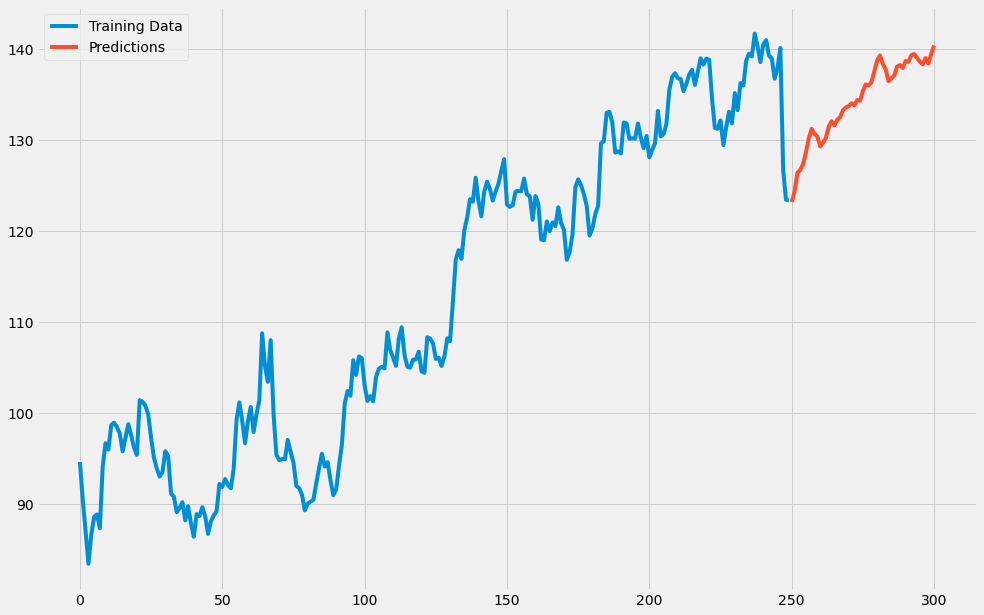

In [25]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [28]:
import plotly.express as px

# Assuming data["Close"] contains your actual data and predictions is a pandas Series containing your predicted values

# Create a DataFrame with the Close data and predictions
import pandas as pd
data = pd.DataFrame({"Close": data["Close"], "Predictions": predictions})

# Create a line chart using Plotly Express
fig = px.line(data, x=data.index, y=["Close", "Predictions"], title="Close Data vs Predictions")
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Value')

# Customize the legend and show the plot
fig.update_traces(line=dict(width=2), connectgaps=True)
fig.show()


ValueError: All arguments should have the same length. The length of argument `y` is 2, whereas the length of  previously-processed arguments ['index'] is 301